In [1]:
import numpy as np
import sympy
sympy.init_printing()
from scipy.optimize import brentq, newton, minimize_scalar
from scipy.integrate import solve_ivp, solve_bvp
from scipy.special import erf
import matplotlib.pyplot as plt

In [2]:
eta, V = sympy.symbols('eta, V')
zeta = sympy.symbols('zeta', positive=True)
tau_Pi = sympy.symbols('tau_Pi', positive=True)
u = sympy.Function('u')
tau = 1

In [3]:
# zeta = 0.1
# tau_Pi = 0.1
# tau = 1
# V = 0
# def f_bvp(eta, q, p):
#     V = p[0]
#     u, du, ddu = q
#     bracket = ((2*u - V)/np.sqrt(tau) - eta/(2*tau))
#     f = np.zeros_like(q)
#     f[0, :] = du
#     f[1, :] = ddu
# #     f[1, :] = ((zeta/tau)*ddu - (zeta*tau_Pi/np.power(tau,3/2))*u*dddu) / (bracket - (zeta*tau_Pi/np.power(tau,3/2))*ddu) # du
# #     f[2, :] = (bracket*du + (zeta*tau_Pi/np.power(tau,3/2))*u*dddu) / ((zeta/tau) + (zeta*tau_Pi/np.power(tau,3/2))*du) # ddu
#     f[2, :] = ( (zeta/tau)*ddu + (zeta*tau_Pi/np.power(tau,3/2))*du*ddu - bracket*du ) / ((zeta*tau_Pi/np.power(tau,3/2))*u) # dddu
#     return f
# def bcs(qa, qb, p):
#     return np.array([qa[0] - 1, qb[0] + 1, qa[1], qb[1]])

In [4]:
zeta = 0.001
tau_Pi = 1
V = 0
def f_bvp(eta, q, p):
    V = p[0]
    u, du, ddu = q
    f = np.zeros_like(q)
    f[0, :] = du
    f[1, :] = ddu
    f[2, :] = ( ((zeta/tau_Pi)*((2*u - V)*du - ddu) - du*ddu) / u) # dddu
    return f
def bcs(qa, qb, p):
    return np.array([qa[0] - 1, qb[0] + 1, qa[1], qb[1]])

In [5]:
eta = np.linspace(-100, 100)
q_guess = np.zeros((3, len(eta)))
q_guess[0, :] = - eta / 100
q_guess[1, :] = - 1 / 100

In [6]:
soln = solve_bvp(f_bvp, bcs, eta, q_guess, p = [0], tol=5e-2)
#soln = solve_bvp(f_bvp, bcs, soln.x, soln.y, p = [0], tol=1e-2)
soln.success

True

In [7]:
soln

       message: 'The algorithm converged to the desired accuracy.'
         niter: 1
             p: array([0.002198])
 rms_residuals: array([3.09306654e-08, 3.17928068e-08, 3.37925800e-08, 3.70140864e-08,
       4.15992972e-08, 4.77583559e-08, 5.57864844e-08, 6.60901420e-08,
       7.92271985e-08, 9.59692411e-08, 1.17400266e-07, 1.45077509e-07,
       1.81302667e-07, 2.29597878e-07, 2.95581099e-07, 3.88669408e-07,
       5.25631886e-07, 7.38675967e-07, 1.09600474e-06, 1.76211836e-06,
       3.21281615e-06, 7.26626203e-06, 2.56217430e-05, 4.53486239e-04,
       7.82414026e-03, 4.52247328e-04, 2.56325254e-05, 7.27410406e-06,
       3.21815667e-06, 1.76610082e-06, 1.09904750e-06, 7.40983687e-07,
       5.27352288e-07, 3.89926729e-07, 2.96481589e-07, 2.30230532e-07,
       1.81740061e-07, 1.45377342e-07, 1.17607320e-07, 9.61174349e-08,
       7.93415142e-08, 6.61883060e-08, 5.58803494e-08, 4.78549969e-08,
       4.17018859e-08, 3.71226688e-08, 3.39049223e-08, 3.19054663e-08,
       3.1040

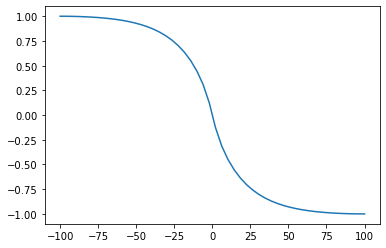

In [8]:
plt.plot(soln.x, soln.y[0, :])

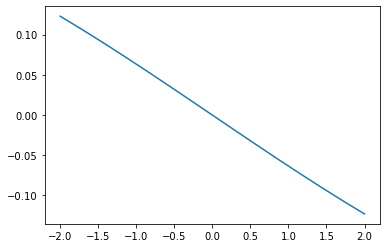

In [9]:
eta_zoom = np.linspace(-2, 2)
plt.plot(eta_zoom, soln.sol(eta_zoom)[0, :])

This is now FO form 2.13

In [10]:
Pi = sympy.Function('Pi')

In [11]:
zeta = 0.001
tau_Pi = 1
V = 0
def f_bvp(eta, q, p):
    V = p[0]
    u, Pi = q
    f = np.zeros_like(q)
    f[0, :] = (zeta*Pi/tau_Pi) / ((V-2*u)*(V-u) - (Pi + (zeta/tau_Pi))) # du
    f[1, :] = f[0, :]*(V-2*u) # dPi
    return f
def bcs(qa, qb, p):
    return np.array([qa[0] - 1, qb[0] + 1, qb[1]])

In [12]:
eta = np.linspace(-100, 100)
q_guess = np.zeros((2, len(eta)))
q_guess[0, :] = - 1 / 100
q_guess[1, :] = - zeta * (1 / 100)

In [13]:
soln = solve_bvp(f_bvp, bcs, eta, q_guess, p = [0], tol=1e-1)
# soln = solve_bvp(f_bvp, bcs, eta, q_guess, tol=1e-1)
soln.success

<ipython-input-11-5556106406b0>:8: RuntimeWarning: overflow encountered in multiply
  f[0, :] = (zeta*Pi/tau_Pi) / ((V-2*u)*(V-u) - (Pi + (zeta/tau_Pi))) # du


False

In [14]:
soln

       message: 'A singular Jacobian encountered when solving the collocation system.'
         niter: 2
             p: array([-1.4663164e+231])
 rms_residuals: array([5.19449466e+84, 4.95210562e+84, 4.71845010e+84, 4.49330653e+84,
       4.27645652e+84, 4.06768489e+84, 3.86677988e+84, 3.67353279e+84,
       3.48773823e+84, 3.30919406e+84, 3.13770134e+84, 2.97306434e+84,
       2.81509038e+84, 2.66359012e+84, 2.51837723e+84, 2.37926867e+84,
       2.24608434e+84, 2.11864738e+84, 1.99678391e+84, 1.88032317e+84,
       1.76909746e+84, 1.66294204e+84, 1.56169523e+84, 1.46519831e+84,
       1.37329555e+84, 1.28583416e+84, 1.20266427e+84, 1.12363892e+84,
       1.04861405e+84, 9.77448434e+83, 9.10003742e+83, 8.46144432e+83,
       7.85737775e+83, 7.28653849e+83, 6.74765496e+83, 6.23948290e+83,
       5.76080548e+83, 5.31043281e+83, 4.88720220e+83, 4.48997729e+83,
       4.11764861e+83, 3.76913287e+83, 3.44337305e+83, 3.13933797e+83,
       2.85602246e+83, 2.59244695e+83, 2.34765732e+83, 2.

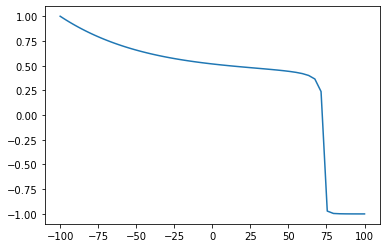

In [15]:
plt.plot(soln.x, soln.y[0, :])

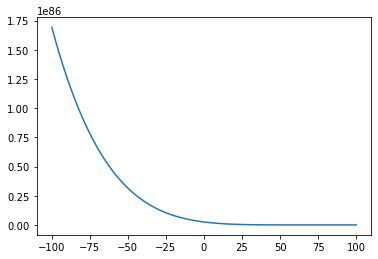

In [16]:
plt.plot(soln.x, soln.y[1, :])

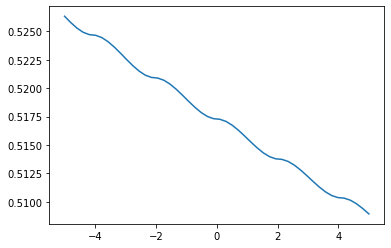

In [17]:
eta_zoom = np.linspace(-5, 5)
plt.plot(eta_zoom, soln.sol(eta_zoom)[0, :])

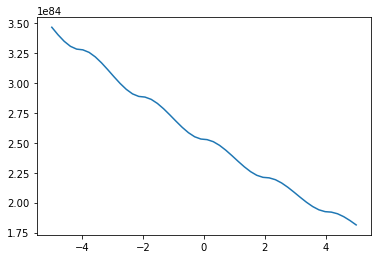

In [18]:
plt.plot(eta_zoom, soln.sol(eta_zoom)[1, :])

This is now FO form 2.16 & 2.13b

In [19]:
zeta = 0.001
tau_Pi = 1
V = 0
def f_bvp(eta, q, p):
    V = p[0]
    u, du, ddu, Pi = q
    f = np.zeros_like(q)
    f[0, :] = du
    f[1, :] = ddu
    f[2, :] = ( ((zeta/tau_Pi)*((2*u - V)*du - ddu) - du*ddu) / u) # dddu
    f[3, :] = du*(V-2*u) # dPi
    return f
def bcs(qa, qb, p):
    return np.array([qa[0] - 1, qb[0] + 1, qa[3], qb[3], qa[1]+qb[1]])

In [20]:
eta = np.linspace(-100, 100)
q_guess = np.zeros((4, len(eta)))
q_guess[0, :] = - eta / 100
q_guess[1, :] = - 1 / 100
q_guess[3, :] = - 1 / 100

In [21]:
soln = solve_bvp(f_bvp, bcs, eta, q_guess, p = [0], tol=1e-1)
# soln = solve_bvp(f_bvp, bcs, eta, q_guess, tol=1e-1)
soln.success

True

In [22]:
soln

       message: 'The algorithm converged to the desired accuracy.'
         niter: 1
             p: array([3.41614584e-06])
 rms_residuals: array([1.34075568e-06, 3.83110959e-06, 6.25392401e-06, 8.86848774e-06,
       1.19248300e-05, 1.56849516e-05, 2.04412799e-05, 2.65309307e-05,
       3.43451914e-05, 4.43305798e-05, 5.69748567e-05, 7.27666051e-05,
       9.21096599e-05, 1.15162655e-04, 1.41557584e-04, 1.69927852e-04,
       1.97144470e-04, 2.17121290e-04, 2.19022558e-04, 1.84759800e-04,
       8.61438676e-05, 1.17304823e-04, 4.62162151e-04, 1.00136050e-03,
       7.14210245e-03, 7.91486368e-04, 3.09039608e-04, 2.73309300e-05,
       1.25946064e-04, 1.85748673e-04, 1.93144561e-04, 1.74059166e-04,
       1.44259846e-04, 1.12589152e-04, 8.35406866e-05, 5.90244912e-05,
       3.95033230e-05, 2.46935012e-05, 1.39796725e-05, 6.64797676e-06,
       2.00837005e-06, 5.83114506e-07, 1.59851254e-06, 1.52969317e-06,
       7.65131660e-07, 3.49078902e-07, 1.35090519e-06, 1.79475033e-06,
       

In [23]:
print(soln.p[0])
print(np.sqrt(zeta/tau_Pi)*zeta)

3.416145837737111e-06
3.1622776601683795e-05


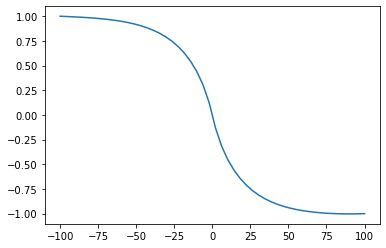

In [24]:
plt.plot(soln.x, soln.y[0, :])

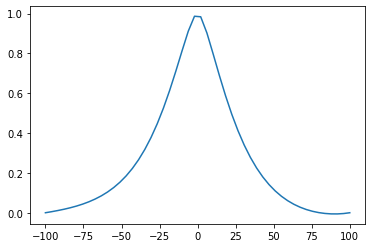

In [25]:
plt.plot(soln.x, soln.y[3, :])

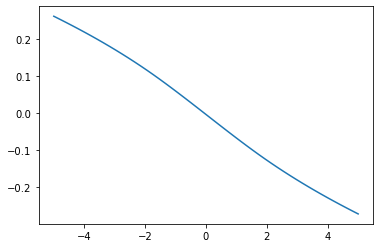

In [26]:
plt.plot(eta_zoom, soln.sol(eta_zoom)[0, :])

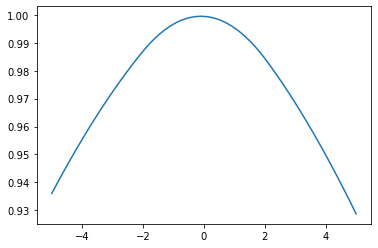

In [27]:
plt.plot(eta_zoom, soln.sol(eta_zoom)[3, :])